# Modelo de Regresión Lineal
Este notebook carga un dataset con características meteorológicas para predecir la temperatura máxima diaria usando regresión lineal.

In [386]:
# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [387]:
# Función para calcular características cíclicas (seno y coseno)
def dayDesc(day_series):
    day_rad = (2 * np.pi * day_series / 365)
    return np.sin(day_rad), np.cos(day_rad)

In [388]:
# Cargar dataset
df = pd.read_csv('./data/temperature_dataset_corregido.csv')
df.head()

,day_of_year,humidity,pressure,rain,temperature
0,1,73,1019.5,0,36.045168
1,2,68,1013.5,0,35.571574
2,3,70,1019.0,0,33.669893
3,4,64,1017.2,0,36.121297
4,5,74,1014.1,0,32.271421


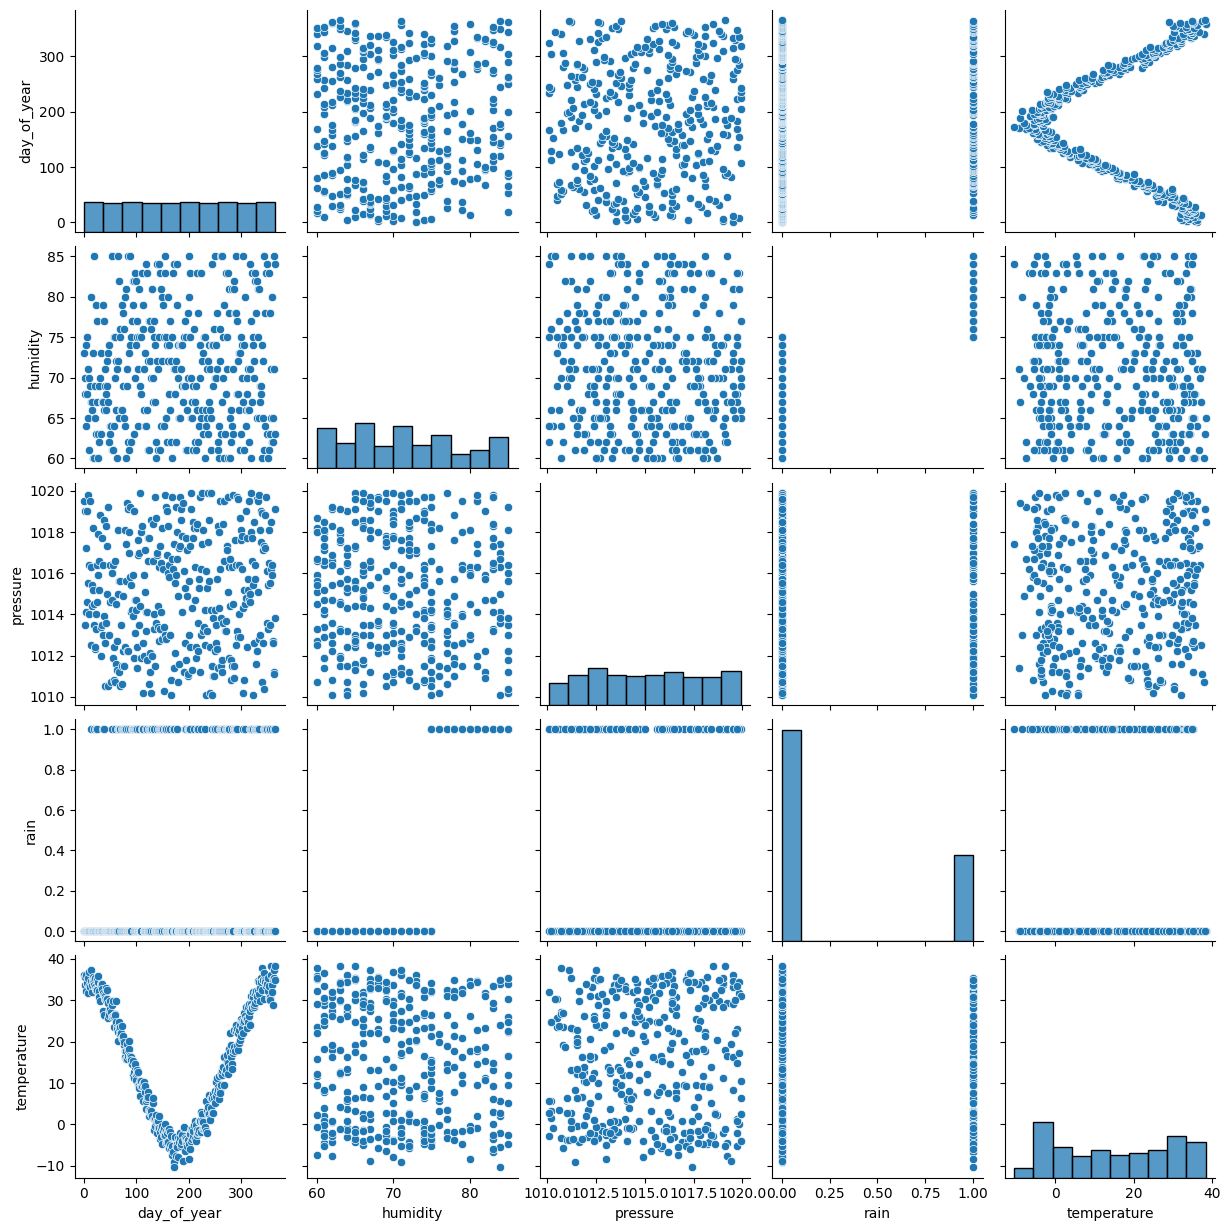

In [389]:
# Visualización rápida
sns.pairplot(df)
plt.show()

In [390]:
day = dayDesc(df['day_of_year'])
df['day_sin'] = day[0]
df['day_cos'] = day[1]
# Separar features y target
X = df[['day_of_year','day_sin', 'day_cos', 'humidity', 'pressure', 'rain']]
y = df['temperature']

# Utilizamos sklearn para estandarizar la matriz de Features
# Escalamos solo las columnas deseadas
columns_to_scale = ['day_sin', 'day_cos', 'humidity', 'pressure', 'rain']
scaler = StandardScaler()
scaled_values = scaler.fit_transform(X[columns_to_scale])

# Convertimos a DataFrame y le sumamos la columna no escalada
X_scaled = pd.DataFrame(scaled_values, columns=columns_to_scale)
X_scaled['day_of_year'] = X['day_of_year'].values  # aseguramos que se mantenga la misma longitud

# Reordenar columnas si querés mantener el orden original
X_scaled = X_scaled[['day_of_year', 'day_sin', 'day_cos', 'humidity', 'pressure', 'rain']]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)


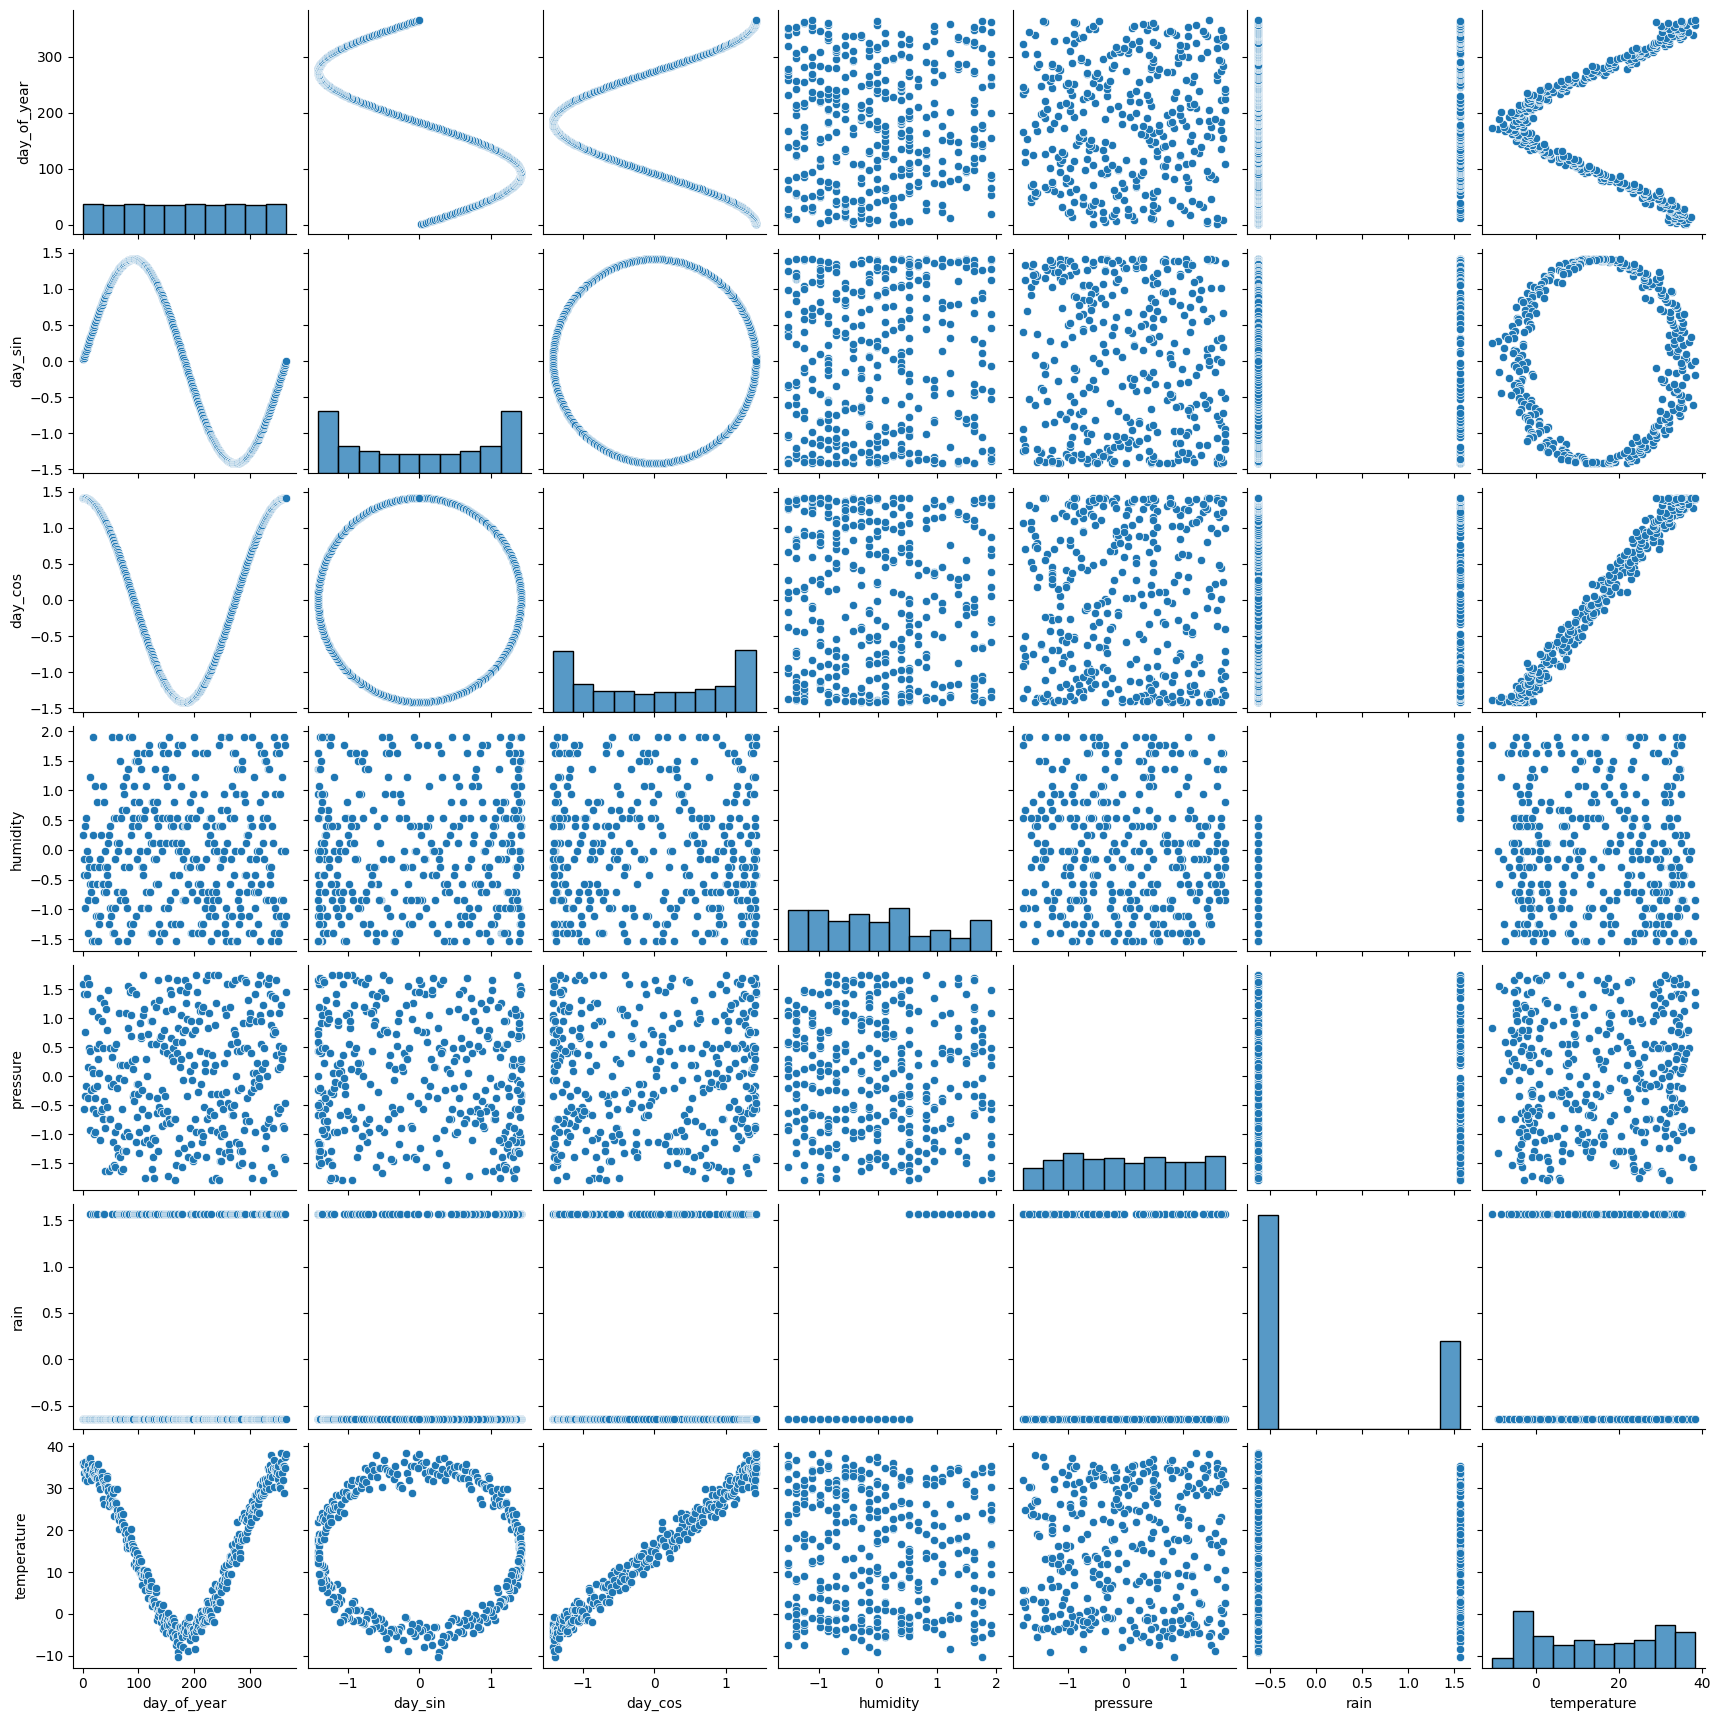

In [391]:
# Visualización rápida
dfScaled = pd.DataFrame(X_scaled)
dfScaled['temperature'] = y
sns.pairplot(dfScaled)
plt.show()

In [392]:
# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [393]:
# Predicciones
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

MSE: 4.25
MAE: 1.66
R²: 0.98


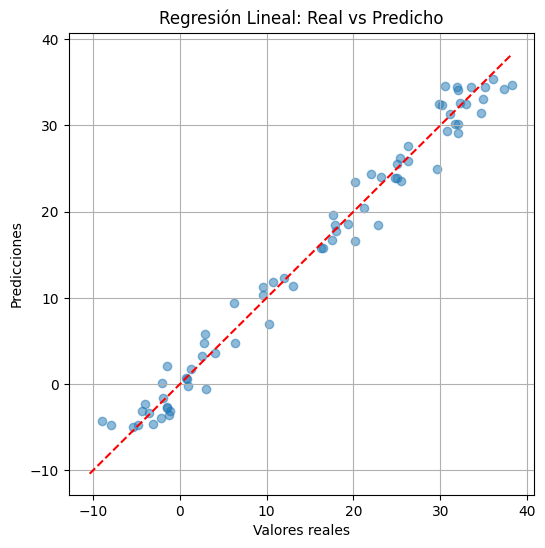

In [394]:
# Visualización de resultados
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Real vs Predicho")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.grid(True)
plt.show()

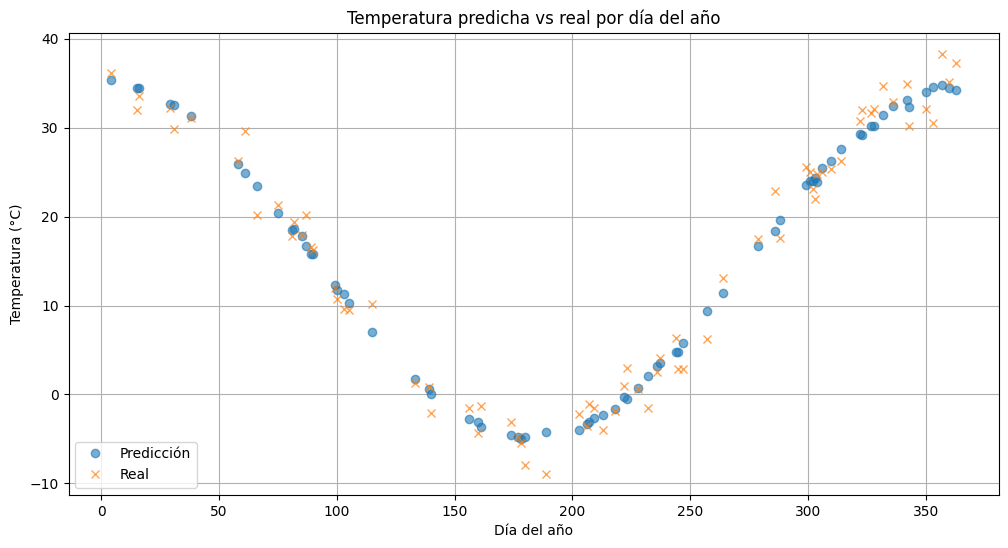

In [395]:
# Visualización: predicción vs día del año
plt.figure(figsize=(12,6))
plt.plot(X_test['day_of_year'], y_pred, 'o', label='Predicción', alpha=0.6)
plt.plot(X_test['day_of_year'], y_test, 'x', label='Real', alpha=0.7)
plt.xlabel("Día del año")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura predicha vs real por día del año")
plt.legend()
plt.grid(True)
plt.show()


In [401]:
# 🔮 Predicción con nuevo registro

# Ejemplo de nuevo registro, con valores "crudos"
nuevo_registro = pd.DataFrame([{
    'day_of_year': 90,   # Ej: 180° día del año
    'humidity': 95,       # Ej: 55%
    'pressure': 1010,     # Ej: 1010 hPa
    'rain': 1             # Ej: sin lluvia
}])

# Calcular day_sin y day_cos
nuevo_registro['day_sin'], nuevo_registro['day_cos'] = dayDesc(nuevo_registro['day_of_year'])

# Especificar el orden de las columnas que fueron escaladas durante el entrenamiento
# En este ejemplo, se escalaban: day_sin, day_cos, humidity, pressure, rain
ordered_columns = ['day_sin', 'day_cos', 'humidity', 'pressure', 'rain']

# NOTA: 'scaler' es el objeto StandardScaler que fue ajustado durante el entrenamiento.
# Transformamos solo las columnas que fueron escaladas
X_nuevo_scaled = scaler.transform(nuevo_registro[ordered_columns])

# Convertir el array escalado nuevamente a DataFrame, y agregar la columna sin escalar "day_of_year"
X_nuevo_final = pd.DataFrame(X_nuevo_scaled, columns=ordered_columns)
X_nuevo_final['day_of_year'] = nuevo_registro['day_of_year'].values

# Reordenar las columnas para que coincidan con el orden original usado en el entrenamiento
X_nuevo_final = X_nuevo_final[['day_of_year', 'day_sin', 'day_cos', 'humidity', 'pressure', 'rain']]

# Realizar la predicción con el modelo entrenado
prediccion = model.predict(X_nuevo_final)
print(f"Temperatura predicha para el día {nuevo_registro['day_of_year'].iloc[0]}: {prediccion[0]:.2f} °C")


Temperatura predicha para el día 90: 14.48 °C
